In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os, sys

# Add project base directory to system path
base_dir = os.path.dirname(os.getcwd())
sys.path.append(base_dir)
from src.psf import calc_psf 

# ---------------------------
# Configuration
# ---------------------------
N = 3000                            # Number of pixels (3000 x 3000)
sensor_size = 3e-3                  # Sensor size in meters
pixel_size = sensor_size / N        # Pixel size in meters
wavelength = 0.5                    # Wavelength in micrometers (um)
focal_length = 5e-3                 # Focal length in meters
z = 5.0                             # Propagation distance in millimeters
sensor_res = sensor_size / pixel_size  # Sensor resolution



In [ ]:
# Define Coordinate System
x = torch.linspace(-sensor_size/2, sensor_size/2, N, dtype=torch.float64)
y = torch.linspace(-sensor_size/2, sensor_size/2, N, dtype=torch.float64)
X, Y = torch.meshgrid(x, y, indexing='ij')


# Initialize Incident Plane Wave
U_incident = torch.ones((N, N), dtype=torch.complex128)  # Uniform plane wave


# Compute Phase Modulation for Metalens
k = 2 * torch.pi / (wavelength * 1e-6)              # Wave number
phase = - (k / (2 * focal_length)) * (X**2 + Y**2)  # Quadratic phase profile


# Compute PSF
psf_result = calc_psf(U_incident, phase, wavelength, z, sensor_res, pixel_size)
print("PSF Result Shape:", psf_result.shape)


PSF Result Shape: torch.Size([201, 201])


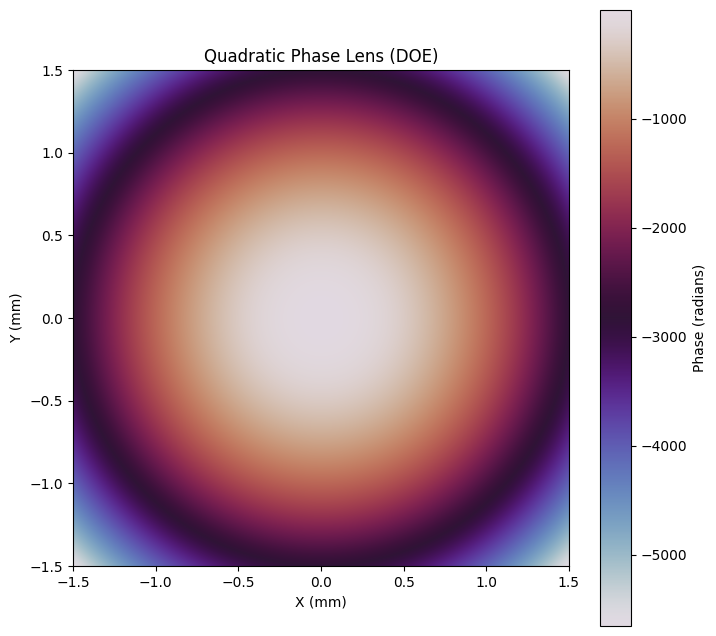

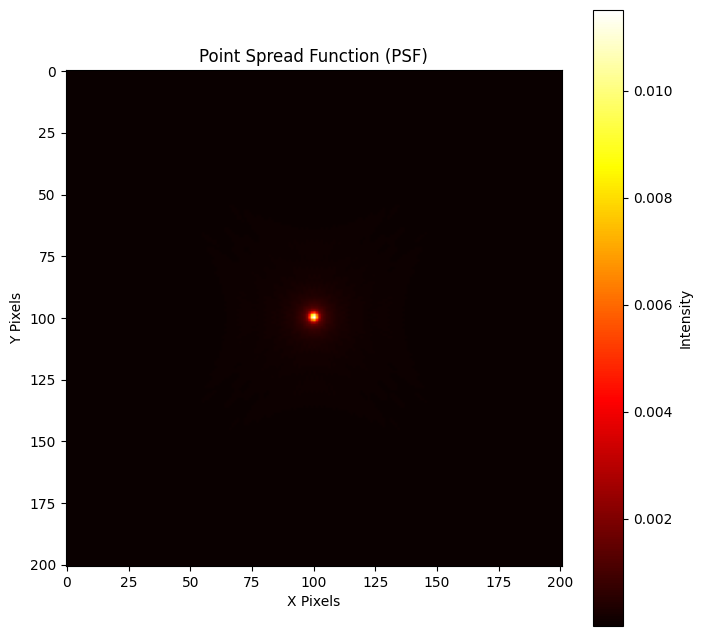

In [3]:

# Visualization
plt.figure(figsize=(8, 8))
plt.imshow(phase, cmap='twilight', extent=[-1.5, 1.5, -1.5, 1.5])  # Display phase profile
plt.colorbar(label="Phase (radians)")
plt.title("Quadratic Phase Lens (DOE)")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(psf_result, cmap='hot')  # Display PSF result
plt.colorbar(label="Intensity")
plt.title("Point Spread Function (PSF)")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.show()
